## To predict Rossmann Store sales that are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('business.csv')

In [3]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
df.shape

(93487, 11)

In [5]:
df1 = pd.read_csv('economy.csv')

In [6]:
df1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [7]:
df1.shape

(206774, 11)

In [8]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [9]:
df.nunique()

date            49
airline          2
ch_code          2
num_code       264
dep_time       166
from             6
time_taken     373
stop            25
arr_time       176
to               6
price         2358
dtype: int64

In [10]:
df.shape

(93487, 11)

In [11]:
df1.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [12]:
df1.shape

(206774, 11)

In [13]:
df1.nunique()

date            49
airline          8
ch_code          8
num_code      1254
dep_time       251
from             6
time_taken     483
stop            37
arr_time       266
to               6
price         9819
dtype: int64

In [14]:
df1.isnull().sum().sum()

0

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df1['date'] = pd.to_datetime(df1['date'])

In [17]:
merged_df = pd.merge(df, df1, on=['ch_code', 'airline', 'num_code'])

In [18]:
merged_df.head()

,date_x,airline,ch_code,num_code,dep_time_x,from_x,time_taken_x,stop_x,arr_time_x,to_x,price_x,date_y,dep_time_y,from_y,time_taken_y,stop_y,arr_time_y,to_y,price_y
0,2022-11-02,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",2022-12-02,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"5,955"
1,2022-11-02,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",2022-02-13,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"6,795"
2,2022-11-02,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",2022-02-14,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"5,955"
3,2022-11-02,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",2022-02-15,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"5,955"
4,2022-11-02,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",2022-02-16,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"5,955"


In [19]:
merged_df.shape

(65988698, 19)

In [14]:
#df['date'] = pd.to_datetime(df['date']) # converting the datatype of date

In [15]:
#df1['date'] = pd.to_datetime(df1['date'])

In [16]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [17]:
merged_df.shape

(1017209, 18)

In [18]:
merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

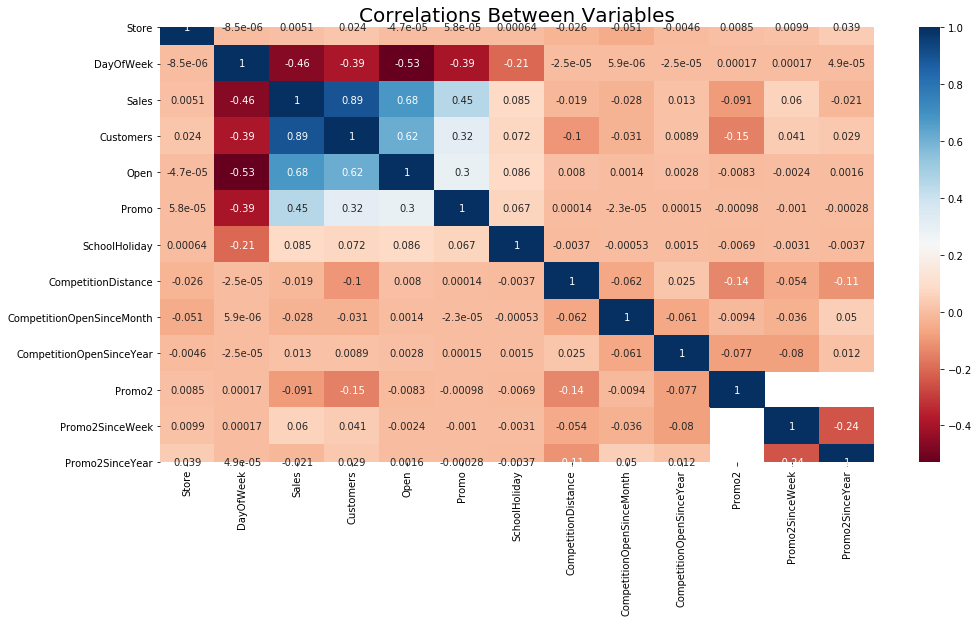

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(merged_df.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=20)
plt.show()

In [20]:
merged_df = merged_df.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis = 1)

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [22]:
holiday_mapping = {'a': 1, 'b': 2, 'c':3,'0':4}
merged_df['StateHoliday'] = merged_df['StateHoliday'].map(holiday_mapping).fillna(0)

In [23]:
holiday_mappings = {'a': 1, 'b': 2, 'c':3,'d':4}
merged_df['StoreType'] = merged_df['StoreType'].map(holiday_mappings)

In [24]:
holidays_mappings = {'a': 1, 'b': 2, 'c':3}
merged_df['Assortment'] = merged_df['Assortment'].map(holidays_mappings)

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  float64       
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1014567 no

In [26]:
median_values = merged_df[['CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].median()
merged_df[['CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']] = merged_df[['CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].fillna(median_values)

In [27]:
random_sample = merged_df.sample(n=20000)

In [28]:
random_sample.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,561.27095,4.018350,5721.977700,627.303000,0.826600,0.38180,3.393600,0.181100,2.194100,1.928700,5493.366500,7.488450,2009.070400,0.495700
std,322.08915,1.991033,3848.377156,462.640942,0.378602,0.48584,1.397096,0.385111,1.363091,0.993512,7827.631358,2.696559,5.386009,0.499994
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,20.000000,1.000000,1900.000000,0.000000
25%,286.00000,2.000000,3675.000000,400.000000,1.000000,0.00000,4.000000,0.000000,1.000000,1.000000,720.000000,6.000000,2008.000000,0.000000
50%,564.00000,4.000000,5691.500000,606.000000,1.000000,0.00000,4.000000,0.000000,1.000000,1.000000,2370.000000,8.000000,2010.000000,0.000000
75%,840.00000,6.000000,7805.000000,831.000000,1.000000,1.00000,4.000000,0.000000,4.000000,3.000000,6912.500000,9.000000,2011.000000,1.000000
max,1115.00000,7.000000,31266.000000,4914.000000,1.000000,1.00000,4.000000,1.000000,4.000000,3.000000,75860.000000,12.000000,2015.000000,1.000000


In [29]:
null_counts = random_sample.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


Text(0, 0.5, 'Sales')

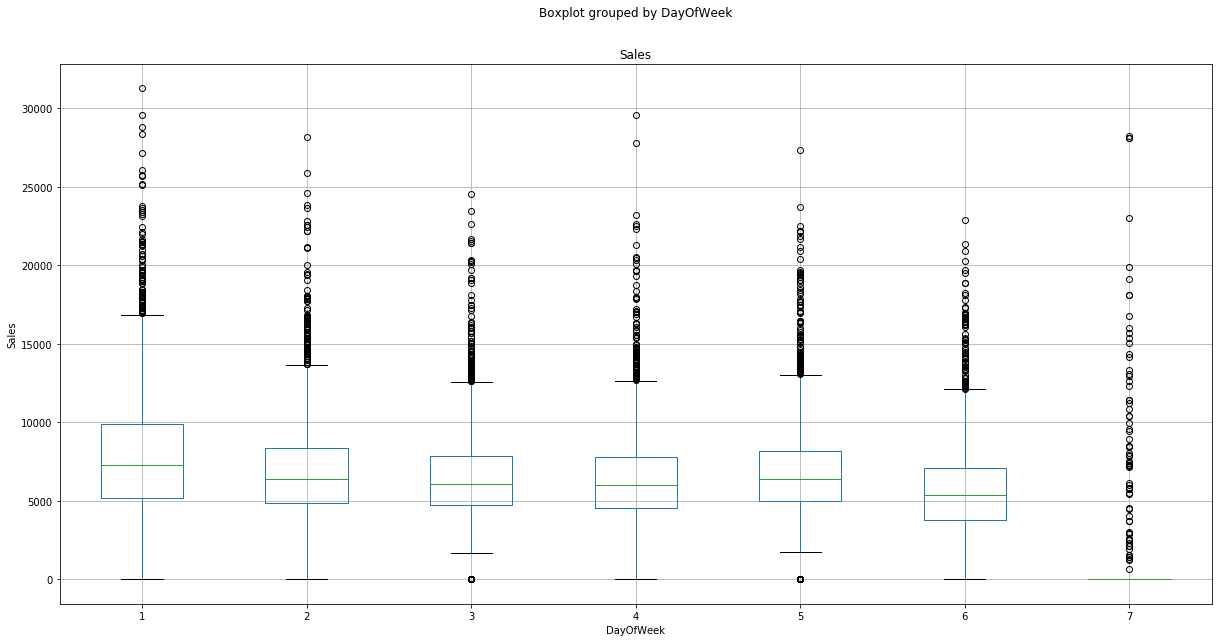

In [30]:
random_sample.boxplot(column='Sales', by='DayOfWeek', figsize=(20, 10))
plt.xlabel('DayOfWeek')
plt.ylabel('Sales')

In [31]:
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day

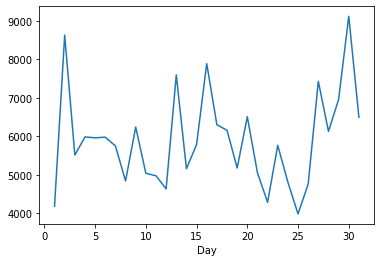

In [32]:
Sales_2015 = merged_df[merged_df['Year']==2015]['Sales'].groupby(merged_df['Day']).mean()
sns.lineplot(x=Sales_2015.index, y=Sales_2015.values)

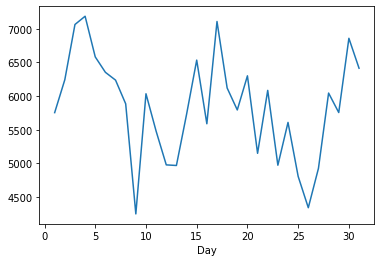

In [33]:
Sales_2014 = merged_df[merged_df['Year']==2014]['Sales'].groupby(merged_df['Day']).mean()
sns.lineplot(x=Sales_2014.index, y=Sales_2014.values)

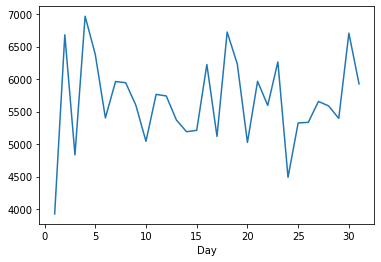

In [34]:
Sales_2013 = merged_df[merged_df['Year']==2013]['Sales'].groupby(merged_df['Day']).mean()
sns.lineplot(x=Sales_2013.index, y=Sales_2013.values)

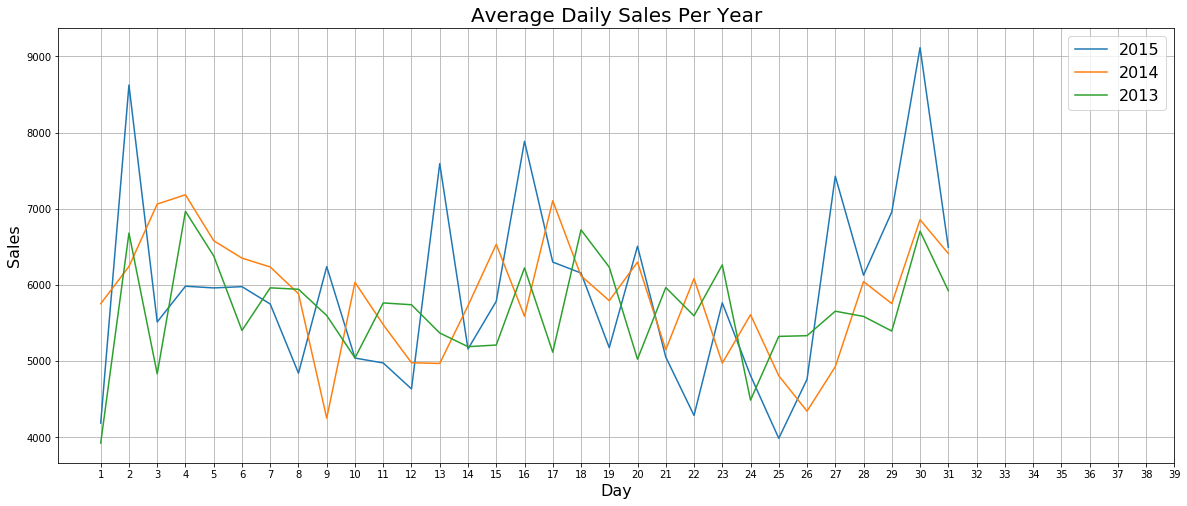

In [35]:
plt.figure(figsize=(20,8))
sns.lineplot(x=Sales_2015.index, y=Sales_2015.values)
sns.lineplot(x=Sales_2014.index, y=Sales_2014.values)
sns.lineplot(x=Sales_2013.index, y=Sales_2013.values)
plt.grid()
plt.xticks(np.arange(1,40, step=1)) #  each day in the data is properly labeled on the x-axis of the plot
plt.legend(['2015', '2014', '2013'], loc='best', fontsize=16)
plt.title('Average Daily Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Day', fontsize=16)
plt.show()

In [36]:
num=merged_df[['Store','DayOfWeek','Sales','Customers','Open','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2']]
num.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0
1,1,4,5020,546,1,1,1,1270.0,9.0,2008.0,0
2,1,3,4782,523,1,1,1,1270.0,9.0,2008.0,0
3,1,2,5011,560,1,1,1,1270.0,9.0,2008.0,0
4,1,1,6102,612,1,1,1,1270.0,9.0,2008.0,0


In [37]:
# normalizing the data
num = (num - num.min()) / (num.max() - num.min())
num

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,0.0,0.666667,0.126664,0.075122,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0
1,0.0,0.500000,0.120815,0.073904,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0
2,0.0,0.333333,0.115087,0.070790,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0
3,0.0,0.166667,0.120599,0.075799,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0
4,0.0,0.000000,0.146856,0.082837,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.0,0.833333,0.114823,0.045885,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0
1017205,1.0,0.666667,0.109263,0.044126,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0
1017206,1.0,0.500000,0.103415,0.040606,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0
1017207,1.0,0.333333,0.088975,0.041283,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0


In [38]:
data1 = pd.concat([num,merged_df['StateHoliday']],axis = 1)
data1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,StateHoliday
0,0.0,0.666667,0.126664,0.075122,1.0,1.0,1.0,0.016482,0.727273,0.93913,0.0,4.0
1,0.0,0.500000,0.120815,0.073904,1.0,1.0,1.0,0.016482,0.727273,0.93913,0.0,4.0
2,0.0,0.333333,0.115087,0.070790,1.0,1.0,1.0,0.016482,0.727273,0.93913,0.0,4.0
3,0.0,0.166667,0.120599,0.075799,1.0,1.0,1.0,0.016482,0.727273,0.93913,0.0,4.0
4,0.0,0.000000,0.146856,0.082837,1.0,1.0,1.0,0.016482,0.727273,0.93913,0.0,4.0


In [39]:
data2 = pd.concat([data1,merged_df['StoreType']],axis = 1)

In [40]:
final_df = pd.concat([data2,merged_df['Assortment']],axis = 1)
final_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,StateHoliday,StoreType,Assortment
0,0.0,0.666667,0.126664,0.075122,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0,4.0,3,1
1,0.0,0.500000,0.120815,0.073904,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0,4.0,3,1
2,0.0,0.333333,0.115087,0.070790,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0,4.0,3,1
3,0.0,0.166667,0.120599,0.075799,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0,4.0,3,1
4,0.0,0.000000,0.146856,0.082837,1.0,1.0,1.0,0.016482,0.727273,0.939130,0.0,4.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.0,0.833333,0.114823,0.045885,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0,4.0,4,3
1017205,1.0,0.666667,0.109263,0.044126,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0,4.0,4,3
1017206,1.0,0.500000,0.103415,0.040606,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0,4.0,4,3
1017207,1.0,0.333333,0.088975,0.041283,1.0,0.0,1.0,0.070280,0.636364,0.956522,1.0,4.0,4,3


In [ ]:
# kernel trick
# hard and soft margin
# Roc
# PC-n or PCA